In [381]:
##  CMSC320 Project 2  
##
##  Credit to:
##  Haitian Hao, Tuo Hu


import pandas as pd
import sqlite3 as sq
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pylab
import pandas as pd

from scipy import stats

# Part 1
# Problem 1

filename = 'lahman2014.sqlite'
conn = sq.connect(filename)

salary_comm = "SELECT teamID, yearID, sum (salary) as total_pay, lgID from Salaries group by teamID, yearID order by teamID"
salary_table = pd.read_sql(salary_comm, conn)
teams_comm = "SELECT teamID, yearID, W as wins, L as losses, (W+L) as games, (100*(cast(W as float))/(cast((W+L) as float))) \
              as 'winning_percent/%' from Teams order by teamID"
teams_table = pd.read_sql(teams_comm, conn)
salary_table2 = salary_table.copy()
teams_table2 = teams_table.copy()
merged_table = salary_table.merge(teams_table, how = "inner")
merged_table

# Some of the data is missing here. Some teams didn't play in all the years, and some years didn't have records of all
# the teams. I applied inner join here and there won't be a problem, since the two rows will be merged only when both
# have the same yearID and teamID, which means there is data. Also, I've noticed the number of games provided doesn't
# match with the sum of number of wins and losses, so I used sum(wins + losses) instead of the number of games.




,teamID,yearID,total_pay,lgID,wins,losses,games,winning_percent/%
0,ANA,1997,31135472.0,AL,84,78,162,51.851852
1,ANA,1998,41281000.0,AL,85,77,162,52.469136
2,ANA,1999,55388166.0,AL,70,92,162,43.209877
3,ANA,2000,51464167.0,AL,82,80,162,50.617284
4,ANA,2001,47535167.0,AL,75,87,162,46.296296
5,ANA,2002,61721667.0,AL,99,63,162,61.111111
6,ANA,2003,79031667.0,AL,77,85,162,47.530864
7,ANA,2004,100534667.0,AL,92,70,162,56.790123
8,ARI,1998,32347000.0,NL,65,97,162,40.123457
9,ARI,1999,68703999.0,NL,100,62,162,61.728395


In [382]:
# Part 2
# Problem 2

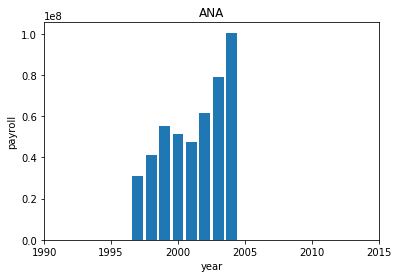

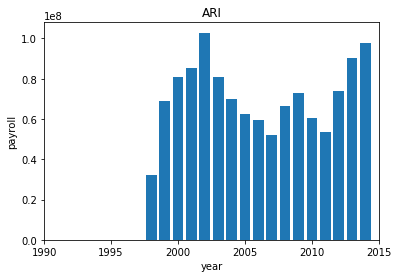

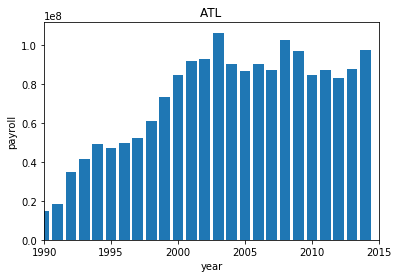

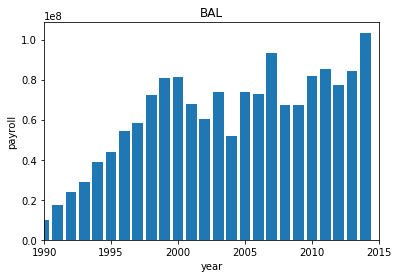

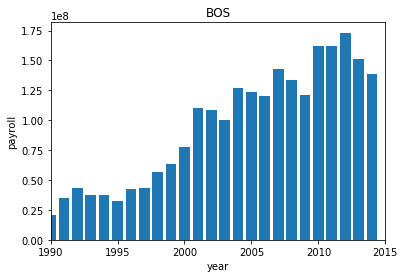

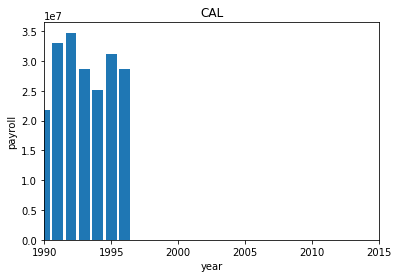

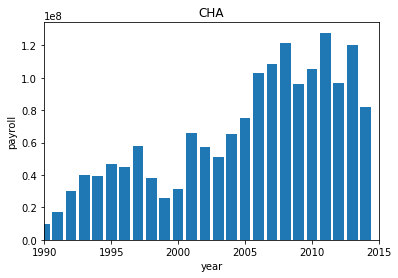

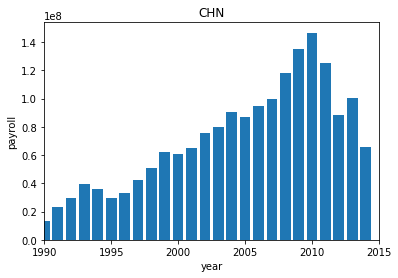

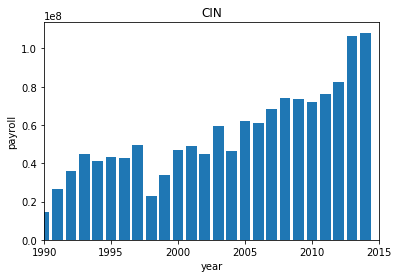

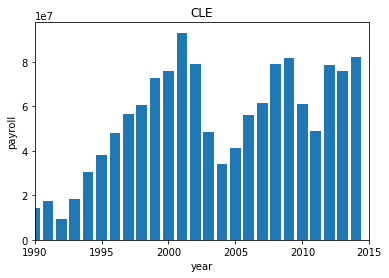

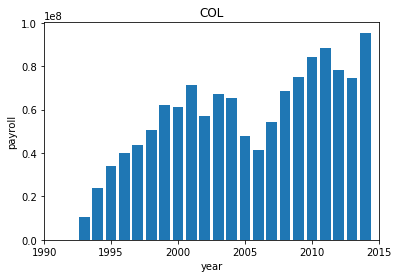

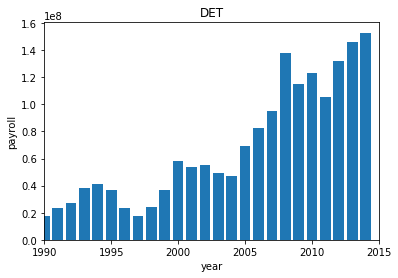

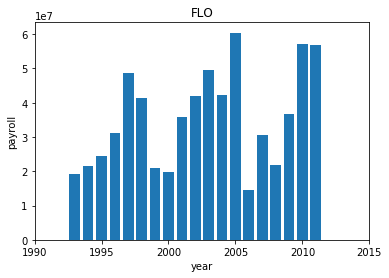

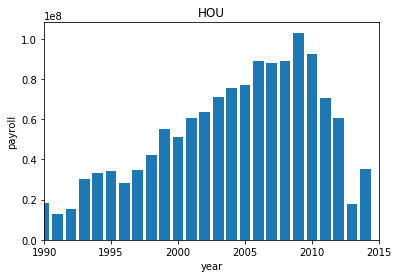

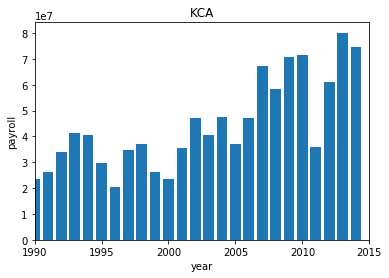

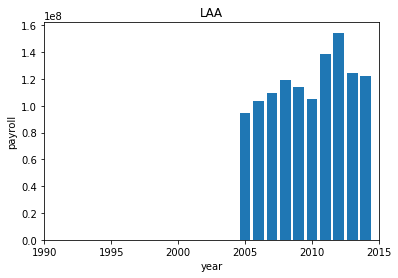

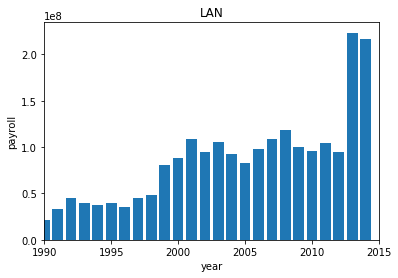

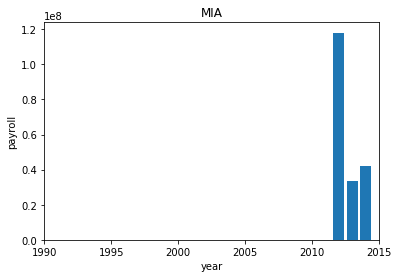

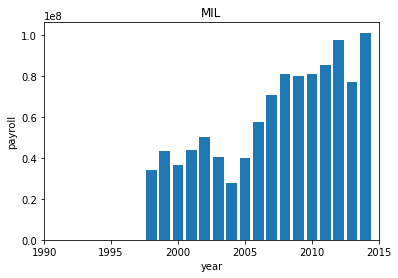

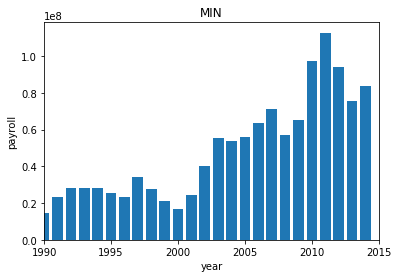

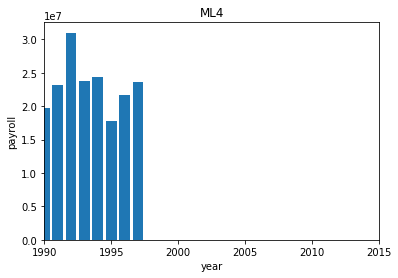

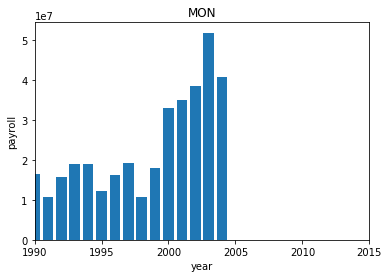

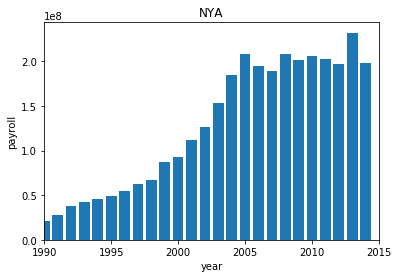

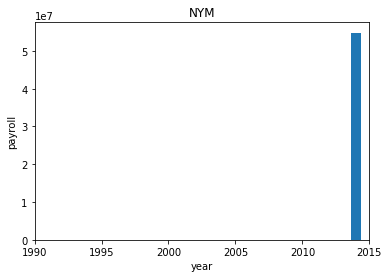

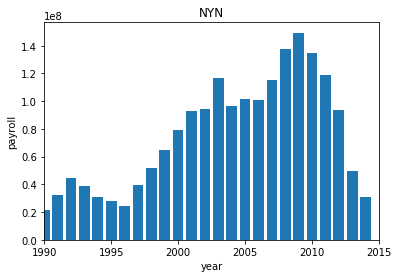

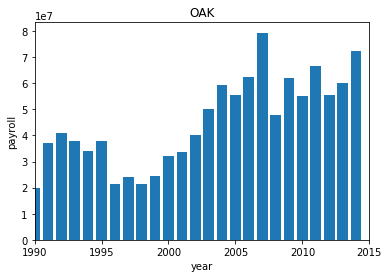

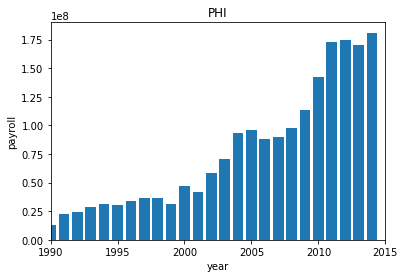

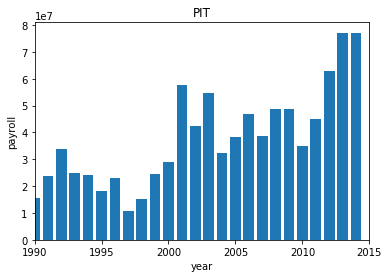

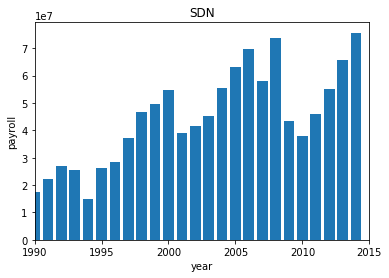

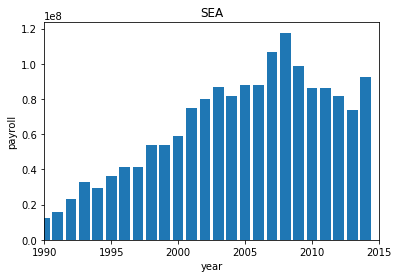

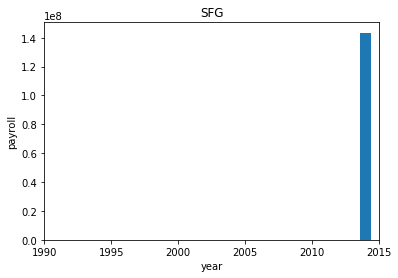

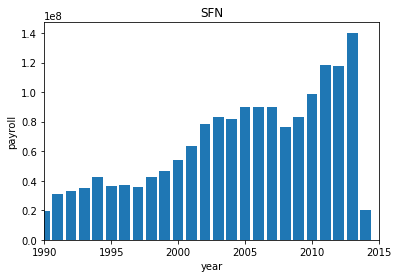

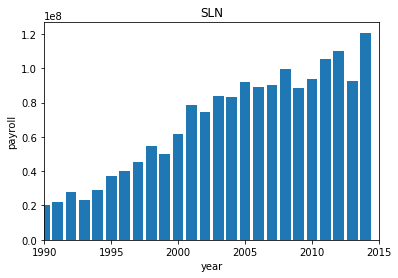

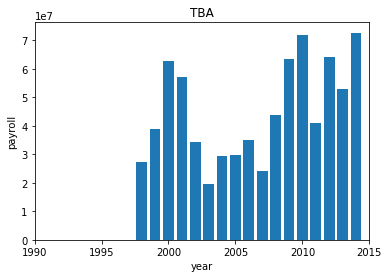

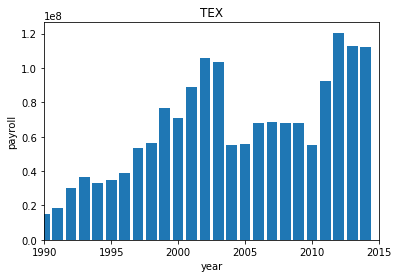

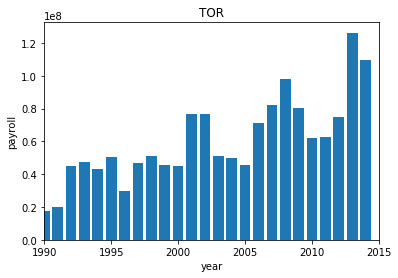

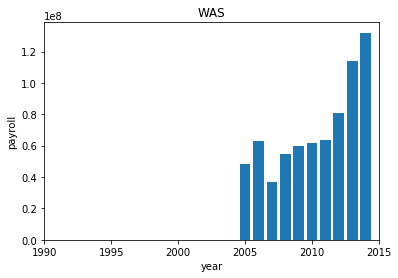

In [383]:
years = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
      2008, 2009, 2010, 2011, 2012, 2013, 2014]
salary_table2 = salary_table.copy()
teams_array = salary_table2.loc[:, 'teamID']
teams = np.unique(teams_array)
for team in teams:
    salary_array = salary_table2.loc[salary_table2['teamID'] == team, 'total_pay']
    years_array = salary_table2.loc[salary_table2['teamID'] == team, 'yearID']
    plt.bar(years_array.to_list(), salary_array.to_list())
    plt.xlabel('year')
    plt.ylabel('payroll')
    plt.title(team)
    plt.xlim(1990, 2015)
    plt.show()

In [384]:
# Question 1
# The total payrolls for each team are overall increasing over time, with a few exceptions in which there is no
# significant change in payroll over time. The central tendency of the mean payroll might be increasing over time. 

In [385]:
# Problem 3

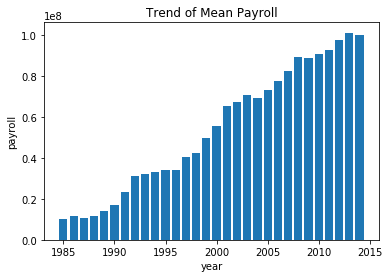

In [386]:
means = merged_table[['yearID', 'total_pay']].groupby('yearID').mean()
plt.bar(means.index, means['total_pay'])
plt.title('Trend of Mean Payroll')
plt.xlabel('year')
plt.ylabel('payroll')
plt.show()

In [387]:
# This graph reflects the correctness of the conclusion from the previous question, that is,
# the mean of payrolls each year is increasing.

In [388]:
# Problem 4

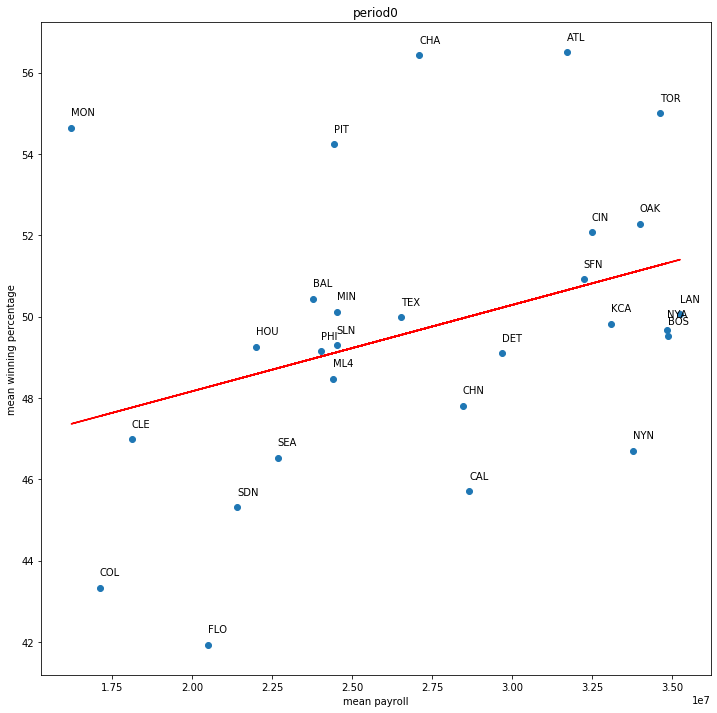

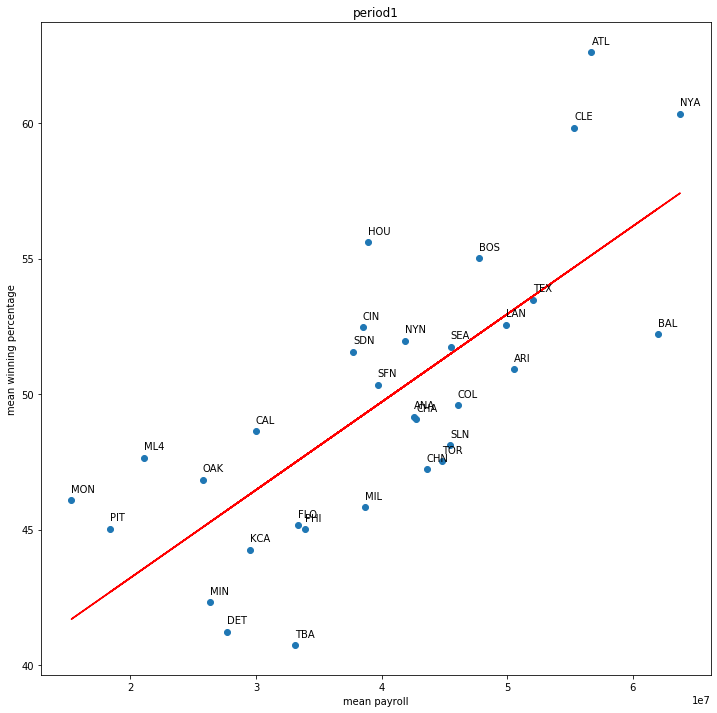

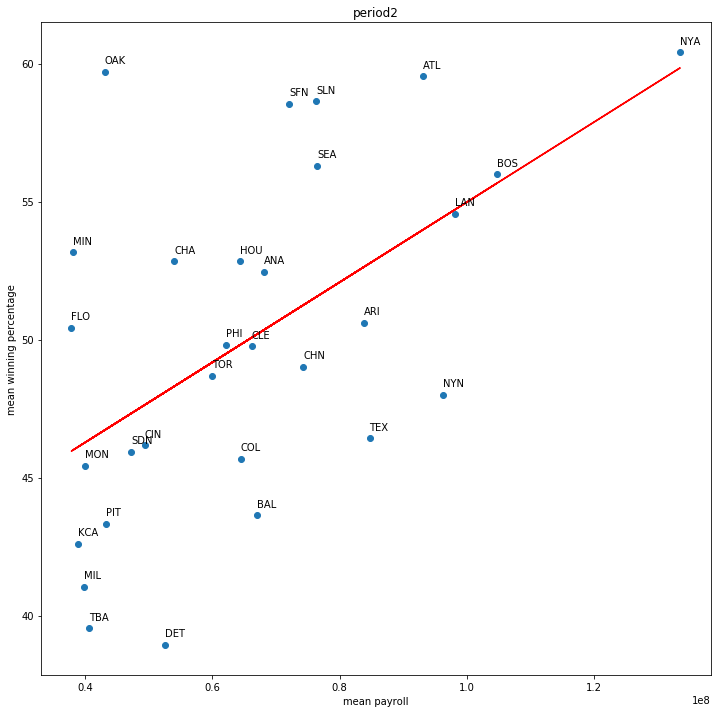

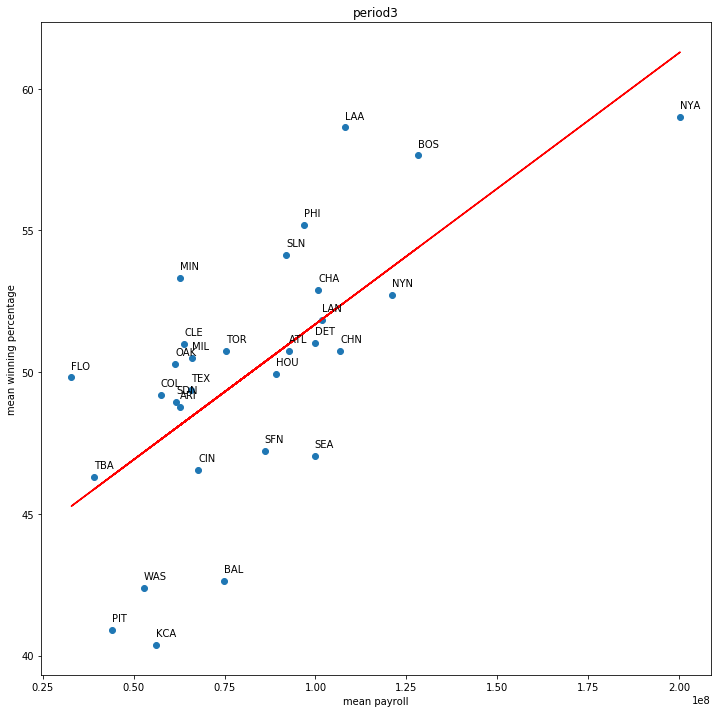

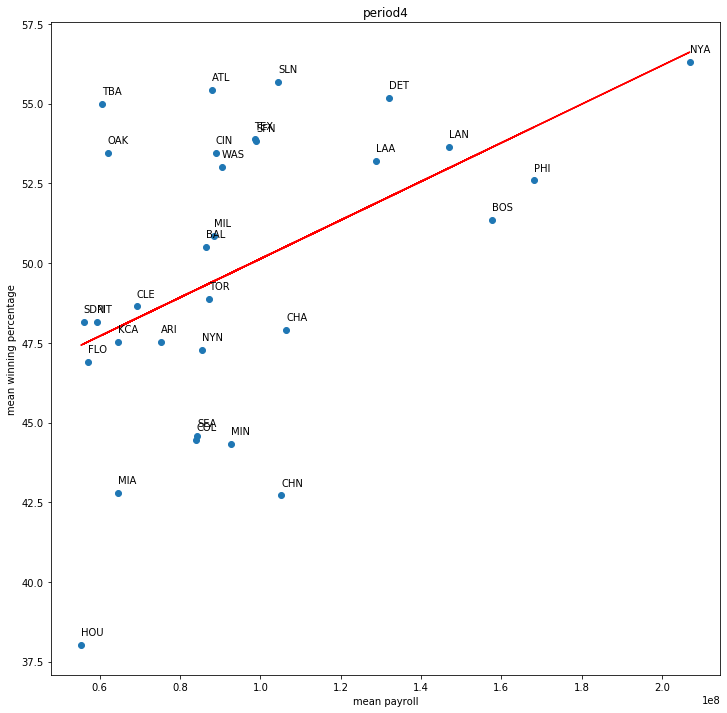

In [389]:
bins = pd.cut(years, 5, retbins = True)
for i in range(0,len(bins[1])-1):
    merged2 = merged_table.copy()
    start = bins[1][i]
    end = bins[1][i+1]
    merged2 = merged2[merged2['yearID'] >= start]
    merged2 = merged2[merged2['yearID'] <= end]
    meansofpay_period = merged2[['teamID', 'total_pay']].groupby('teamID').mean()
    meansofwinpercent_period = merged2[['teamID', 'winning_percent/%']].groupby('teamID').mean()
    years_period = merged2.yearID.unique()
    
    plt.figure(figsize=(12,12))
    plt.scatter(meansofpay_period, meansofwinpercent_period)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(meansofpay_period['total_pay'],meansofwinpercent_period['winning_percent/%'])
    plt.plot(meansofpay_period['total_pay'], intercept + slope*meansofpay_period['total_pay'], 'r', label='Regression Line',linestyle = 'solid')

    
    for j, txt in enumerate(meansofpay_period.index):
        plt.annotate(txt, (meansofpay_period['total_pay'][j], meansofwinpercent_period['winning_percent/%'][j]), (meansofpay_period['total_pay'][j], meansofwinpercent_period['winning_percent/%'][j] + .3))

    plt.title('period' + str(i))
    plt.xlabel('mean payroll')
    plt.ylabel('mean winning percentage')
    
    plt.show()

In [390]:
# Question 2
# The team payrolls are increasing across these periods, since the range of x-axis is increasing. The regression iine
# represents an average level of efficiency of the usage of money. I can see Oak A's did a great job in investing in period 3,
# when it reached the top over every other team. Then in the next period, the Oak A's was reached by other teams, and
# this matches what happened in history. Finally, Oak A's got back to the peak again. Boston Redsox is always investing
# the most amount of money in the league.

In [391]:
# Part 3
# Problem 5

In [392]:
df_prob5 = merged_table.copy()
avg_payroll = df_prob5.groupby(['yearID']).mean().total_pay
stdpayroll_year = df_prob5.groupby(['yearID']).std().total_pay
std = []
for i in range(0, len(df_prob5)):
    year = df_prob5['yearID'][i]
    tmp_std = (df_prob5['total_pay'][i] - avg_payroll[year])/stdpayroll_year[year]
    std.append(tmp_std)
    
df_prob5['standardized_payroll'] = std
df_prob5

,teamID,yearID,total_pay,lgID,wins,losses,games,winning_percent/%,standardized_payroll
0,ANA,1997,31135472.0,AL,84,78,162,51.851852,-0.698639
1,ANA,1998,41281000.0,AL,85,77,162,52.469136,-0.086369
2,ANA,1999,55388166.0,AL,70,92,162,43.209877,0.271410
3,ANA,2000,51464167.0,AL,82,80,162,50.617284,-0.190214
4,ANA,2001,47535167.0,AL,75,87,162,46.296296,-0.721244
5,ANA,2002,61721667.0,AL,99,63,162,61.111111,-0.232769
6,ANA,2003,79031667.0,AL,77,85,162,47.530864,0.288791
7,ANA,2004,100534667.0,AL,92,70,162,56.790123,0.960040
8,ARI,1998,32347000.0,NL,65,97,162,40.123457,-0.667223
9,ARI,1999,68703999.0,NL,100,62,162,61.728395,0.919025


In [393]:
# Problem 6

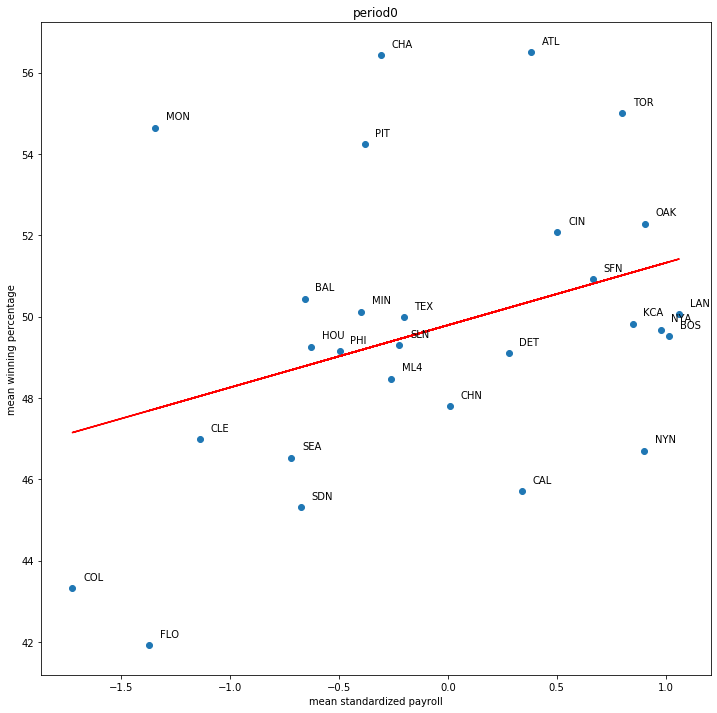

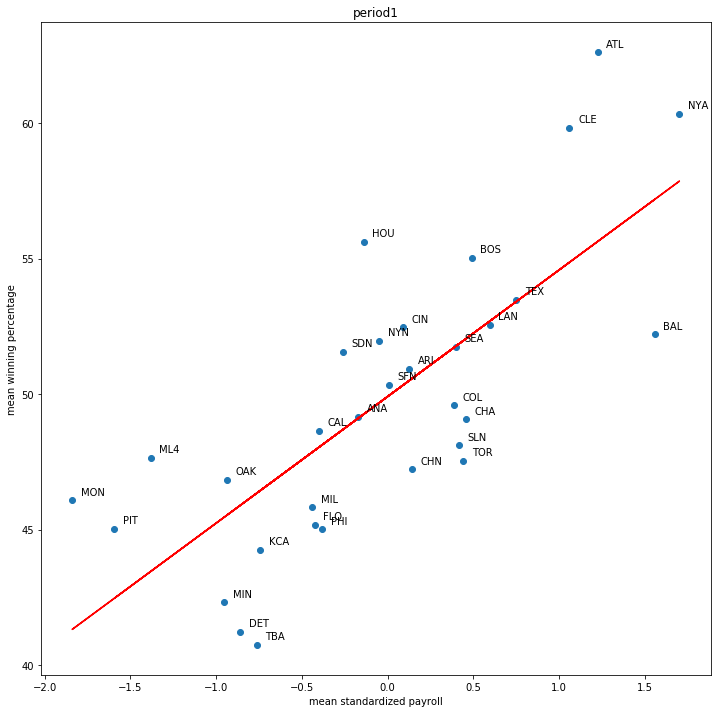

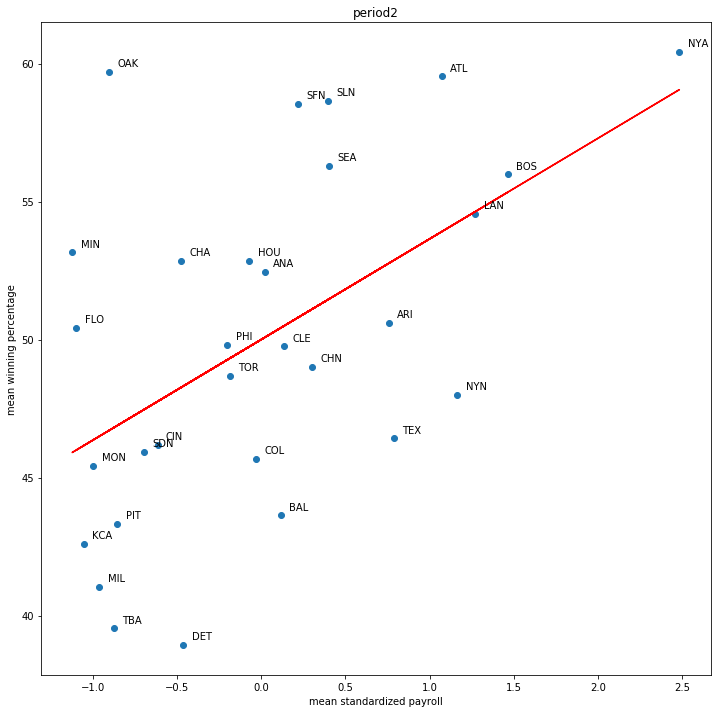

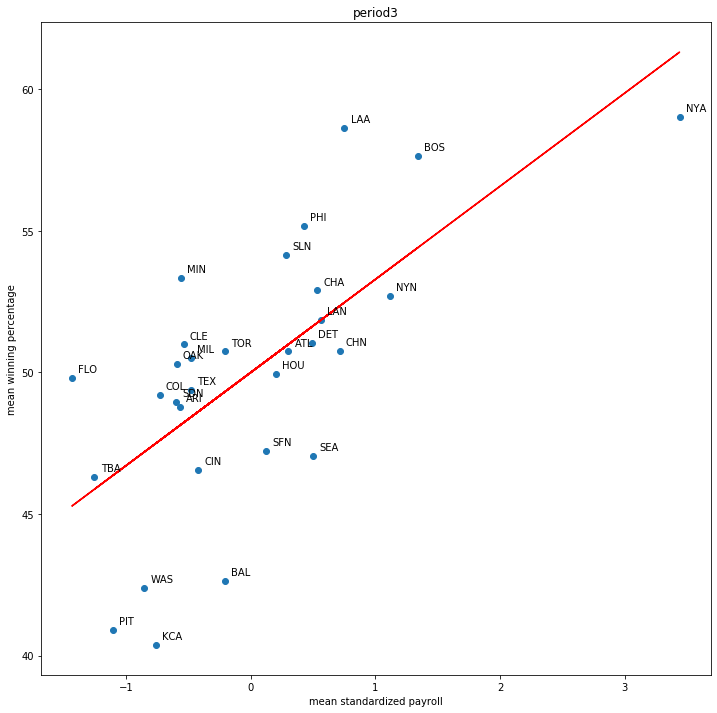

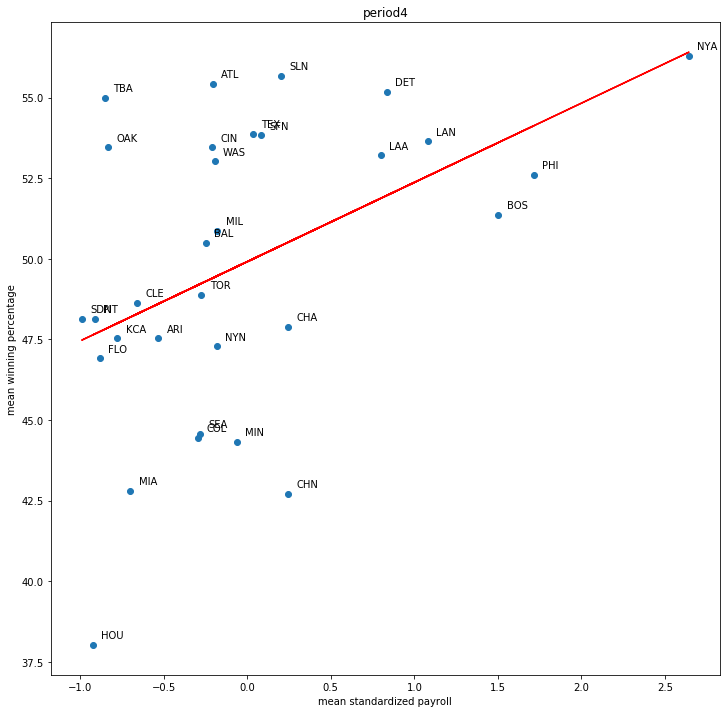

In [394]:

# Repeat the process of Problem 4
bins = pd.cut(years, 5, retbins = True)
for i in range(0,len(bins[1])-1):
    start = bins[1][i]
    end = bins[1][i+1]
    newtable = df_prob5.copy()

    newtable = newtable[newtable['yearID'] >= start]
    newtable = newtable[newtable['yearID'] <= end]
    
    meansofstd_period = newtable[['teamID', 'standardized_payroll']].groupby('teamID').mean()
    meansofwinpercent_period = newtable[['teamID', 'winning_percent/%']].groupby('teamID').mean()
#     years_period = newtable.yearID.unique()

    plt.figure(figsize=(12,12))
    plt.scatter(meansofstd_period, meansofwinpercent_period)
    slope, intercept, r_value, p_value, std_err = stats.linregress(meansofstd_period['standardized_payroll'],meansofwinpercent_period['winning_percent/%'])
    plt.plot(meansofstd_period['standardized_payroll'], intercept + slope*meansofstd_period['standardized_payroll'], 'r', label='Regression Line',linestyle = 'solid')

    for j, txt in enumerate(meansofstd_period.index):
        plt.annotate(txt, (meansofstd_period['standardized_payroll'][j], 
                           meansofwinpercent_period['winning_percent/%'][j]),
                          (meansofstd_period['standardized_payroll'][j]+.05, meansofwinpercent_period['winning_percent/%'][j] + .2))

    plt.title('period' + str(i))
    plt.xlabel('mean standardized payroll')
    plt.ylabel('mean winning percentage')
    
    plt.show()


In [395]:
# Question 3   
# The shape of the plots in Probelm 6 are almost the same with the polts in Problem 4. The unit and the range of X-coordinate
# changed. By doing standardizaion, we can see which data is near the mean point directly. And we can know pretty
# straightforwardly that in what degree is a data away from the mean.

In [396]:
# Problem 7

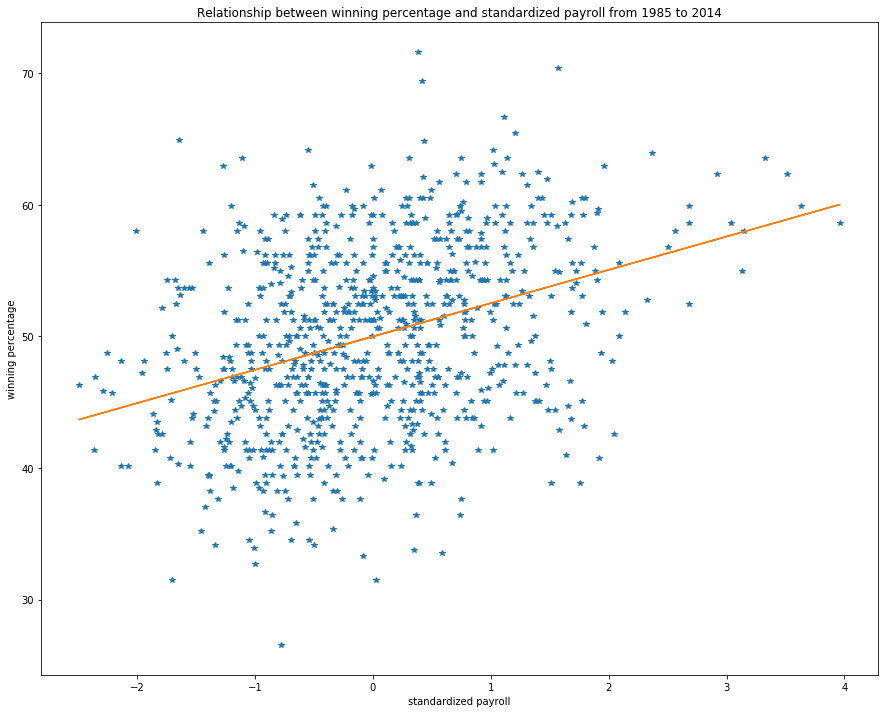

,yearID,teamID,reality,expectation
0,1997,ANA,51.851852,48.253402
1,1998,ANA,52.469136,49.784077
2,1999,ANA,43.209877,50.678524
3,2000,ANA,50.617284,49.524464
4,2001,ANA,46.296296,48.196891
5,2002,ANA,61.111111,49.418077
6,2003,ANA,47.530864,50.721977
7,2004,ANA,56.790123,52.400100
8,1998,ARI,40.123457,48.331943
9,1999,ARI,61.728395,52.297562


In [397]:
# Problem 7

df_prob7 = df_prob5.copy()
winslist = df_prob7['winning_percent/%']
stdlist = df_prob7.standardized_payroll

plt.figure(figsize=(15,12))

# plt.scatter(stdlist, winslist, marker="*", color = 'b')
plt.xlabel('standardized payroll')
plt.ylabel('winning percentage')
plt.title('Relationship between winning percentage and standardized payroll from 1985 to 2014')
slope, intercept, r_value, p_value, std_err = stats.linregress(stdlist, winslist)
plt.plot(stdlist, winslist, '*',stdlist ,line)
plt.show()

# The calculated result of the intercept and the slope are rspectively 49.99 and 2.53
# Will use 50 and 2.5 as provided instead and find the expected wins

# The sweet thing is that we don't need to use for loop to go through element in a list, instead,
# simply apply the algorithm to the list as a whole directly
expected_wins = df_prob7.standardized_payroll * 2.5 + 50

# Create a new plot to compare
new_df = pd.DataFrame(df_prob7.yearID)
new_df['teamID'] = df_prob7.teamID
new_df['reality'] = winslist
new_df['expectation'] = expected_wins
new_df


In [398]:
# Problem 8

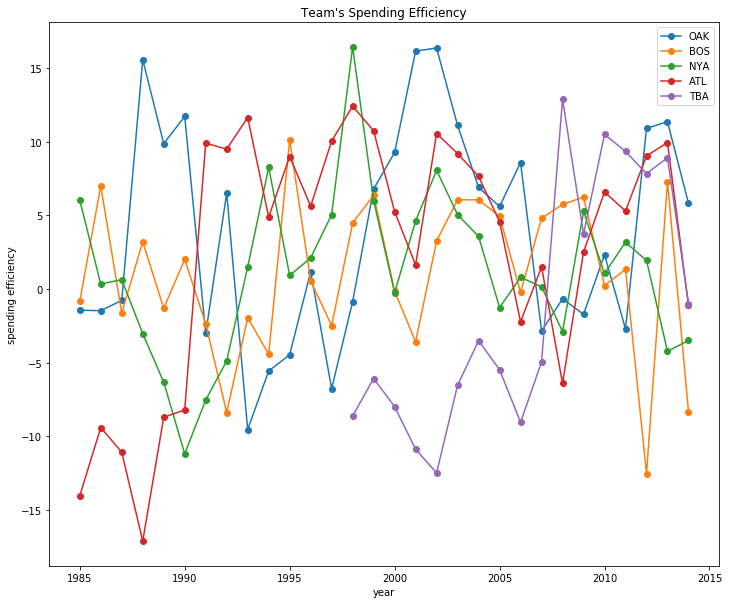

In [399]:
df_eff = new_df.copy()
eff_list = df_eff.reality - df_eff.expectation
df_prob8 = df_prob7.copy()
df_prob8['difference'] = eff_list

teamlist = ['OAK', 'BOS', 'NYA', 'ATL', 'TBA']
plt.figure(figsize=(12, 10))
for team in teamlist:
    tmp_df = df_prob8[df_prob8.teamID == team]
    tmp_eff = tmp_df['difference']
    yearlist = tmp_df['yearID']
    plt.plot(yearlist, tmp_eff, marker = 'o', label = team)

plt.xlabel("year")
plt.ylabel("spending efficiency")
plt.title("Team's Spending Efficiency")
plt.legend()
plt.show()

In [400]:
# Question 4
# The major difference shown here compared to the previous result is that it shows the trend of each team over the time.
# We can see over the time if any of the team were learning to master and improve the spending efficiency. It turns out
# that Oak A's made a hugh jump during the period 1997-2002, however, it did worse later and bounced up and down.
# What I didn't observed in Question 2 and 3 are some of the sudden spending_efficiency changes in a small period,
# such as NYA's great spending_effiency in 1998. Overall, this graph focuses much on the trend, which is really useful
# in data analysis.